# Airline Analysis

In this project, I will examine a dataset provided by Codecademy for learning purposes. The goal is to explore and get to know the data using various methods. I will imagine that I work for a travel agency and need to know the ins and outs of airline prices for the clients.

Variables included in the dataset:

Variables included in the dataset:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


## Univariate Analysis

In [1]:
## Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
import statsmodels.api as sm

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


### Q1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [2]:
# Investigating dataset
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [3]:
flight.describe()

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


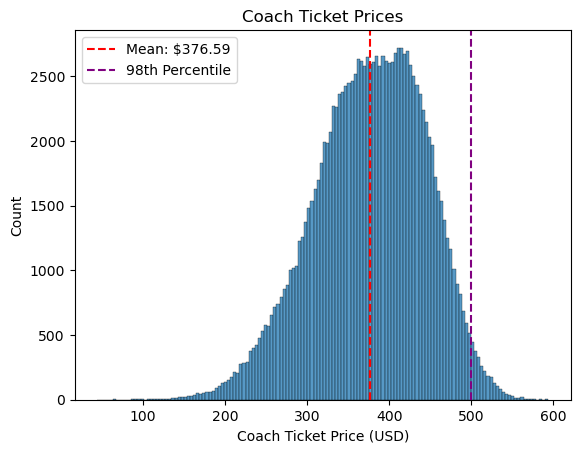

<Figure size 640x480 with 0 Axes>

In [4]:
# Visualizing coach ticket price distribution 
percentile_500 = round(100 * flight[flight.coach_price < 500].coach_price.count() / flight.coach_price.count())

mean_price = flight.coach_price.mean()
sns.histplot(flight.coach_price)
plt.title('Coach Ticket Prices')
plt.xlabel('Coach Ticket Price (USD)')
plt.axvline(mean_price,color='red',linestyle='--',label=f'Mean: ${round(mean_price,2)}')
plt.axvline(500,color='purple',linestyle='--',label=f'{percentile_500}th Percentile')
plt.legend(loc='upper left')
plt.show()
plt.clf()

### Q1.  Answers:

**What do coach ticket prices look like?**

Coach ticket prices are significantly lower than first-class ticket prices. The average coach ticket costs over \\$1000 less than an average first-class ticket. For comparison, the most expensive coach ticket costs \\$346 less than the cheapest first-class ticket.

**What are the high and low values?**

The coach ticket prices vary between \\$44.4 and \\$593.6.

**What would be considered the average?**

The average coach ticket price is \\$376.

**Does \\$500 seem like a good price for a coach ticket?**

No, considering that 97% of coach tickets cost less than \\$500.

### Q2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a 500 dollar ticket seem more reasonable than before?

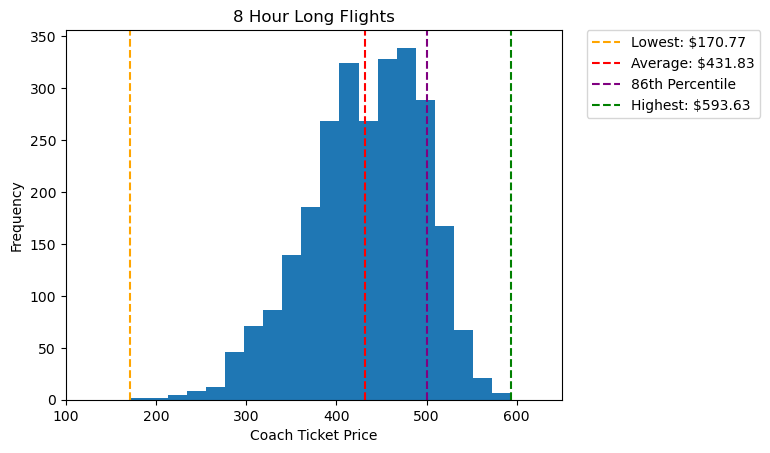

<Figure size 640x480 with 0 Axes>

In [5]:
flights_8_hours = flight[flight.hours == 8]
flights_mean = round(flights_8_hours.coach_price.mean(),2)
flights_median = round(flights_8_hours.coach_price.median(),2)
lowest_price = round(flights_8_hours.coach_price.min(),2)
highest_price = round(flights_8_hours.coach_price.max(),2)
percentile_500 = round(100 * flights_8_hours[flights_8_hours.coach_price < 500].coach_price.count() \
                       / flights_8_hours.coach_price.count())
plt.hist(flights_8_hours.coach_price, bins=20)
plt.xlim(100,650)
plt.title(f"8 Hour Long Flights")
plt.axvline(lowest_price, linestyle='dashed', color='orange', label=f'Lowest: ${lowest_price}')
plt.axvline(flights_mean, linestyle='dashed', color='red', label=f'Average: ${flights_mean}')
plt.axvline(500, linestyle='dashed', color='purple', label=f'{percentile_500}th Percentile')
plt.axvline(highest_price, linestyle='dashed', color='green', label=f'Highest: ${highest_price}')
plt.xlabel("Coach Ticket Price")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

### Q2.  Answers:

**What are the high and low values?**

The coach ticket prices vary between \\$44.4 and \\$593.6.

**What would be considered the average?**

The average coach ticket price is \\$376.

**Does a \\$500 ticket seem more reasonable than before?**

Yes, considering that 85% of 8-hour coach tickets cost less than \\$500, compared to 97%. However, the price is still quite high.

### Q3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [6]:
flight.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

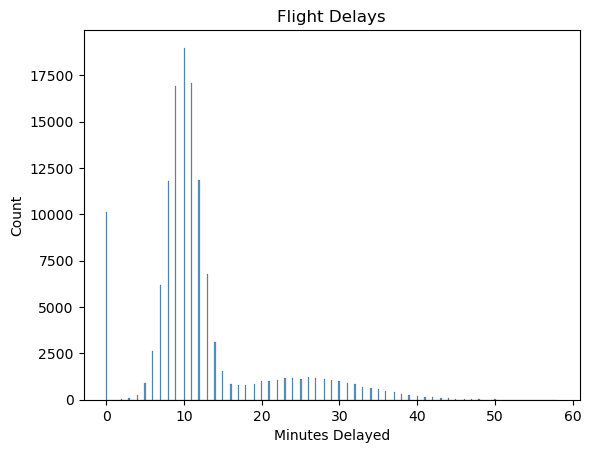

<Figure size 640x480 with 0 Axes>

In [7]:
sns.histplot(flight.delay[flight.delay < 500])
plt.title("Flight Delays")
plt.xlabel("Minutes Delayed")
plt.show()
plt.clf()

### Q3.  Answers:

**How are flight delay times distributed?**

The values plot is skewed to the left-hand side with two modes on the left-hand side - one very well-defined mode is centered at around 10 minutes delay, the other at around 0 minutes. The values are ranging between 0 to around 6o minutes, though there are more extreme rare cases that would result in very far outliers, thus they were not included in this plot.

**What kinds of delays are typical?**

The majority of flights face around 10-minute delays, but it is fairly common that flights are right on time, being late no longer than a couple of minutes. Delays between 15 - 40 minutes happen significantly less. Delays longer than 40 minutes are very unlikely but there are extreme cases such as when a flight has been delayed for 1560 minutes.  

## Bivariate Analysis

### Q4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

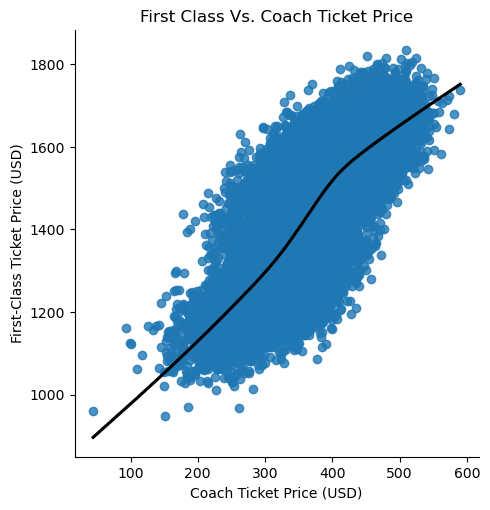

<Figure size 640x480 with 0 Axes>

In [8]:
perc = 0.2
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.title('First Class Vs. Coach Ticket Price')
plt.ylabel('First-Class Ticket Price (USD)')
plt.xlabel('Coach Ticket Price (USD)')
plt.show()
plt.clf()


### Q4. Answers:

**What is the relationship between coach and first-class ticket prices? Do flights with higher coach prices always have higher first-class prices as well?**

There is a strong correlation between coach and first-class ticket prices, a conclusion can be drawn that usually flights with higher coach ticket prices tend to have higher first-class ticket prices.

### Q5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight Wi-Fi? Which features are associated with the highest increase in price?

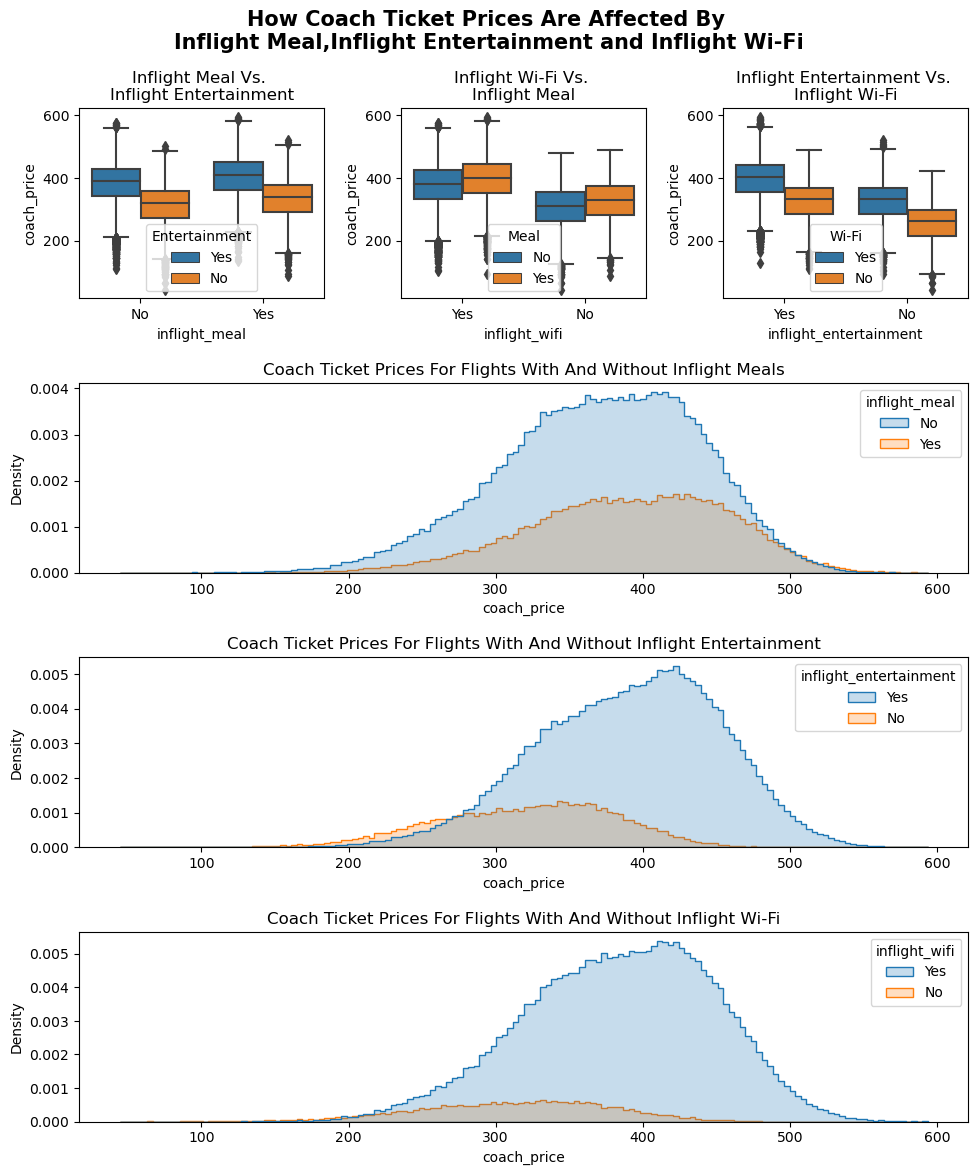

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(10,12))
gs = fig.add_gridspec(4,3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])

fig.suptitle("How Coach Ticket Prices Are Affected By \nInflight Meal,Inflight Entertainment and Inflight Wi-Fi",\
             fontweight ="bold", fontsize=15)
sns.boxplot(ax=ax1, x = "inflight_meal", y = "coach_price", hue = "inflight_entertainment", data = flight)
ax1.legend(loc='lower center', title='Entertainment')
ax1.title.set_text('Inflight Meal Vs. \nInflight Entertainment')
sns.boxplot(ax=ax2, x = "inflight_wifi", y = "coach_price", hue = "inflight_meal", data = flight)
ax2.legend(loc='lower center', title='Meal')
ax2.title.set_text('Inflight Wi-Fi Vs. \nInflight Meal')
sns.boxplot(ax=ax3, x= "inflight_entertainment", y = "coach_price", hue = "inflight_wifi", data = flight)
ax3.legend(loc='lower center', title='Wi-Fi')
ax3.title.set_text('Inflight Entertainment Vs. \nInflight Wi-Fi')
sns.histplot(ax=ax4, data=flight, x='coach_price', hue='inflight_meal', element='step', stat="density")
ax4.set_title("Coach Ticket Prices For Flights With And Without Inflight Meals")
fig.tight_layout(pad=1.5)
sns.histplot(ax=ax5, data=flight, x='coach_price', hue='inflight_entertainment', element='step', stat="density")
ax5.set_title("Coach Ticket Prices For Flights With And Without Inflight Entertainment")
fig.tight_layout(pad=1.5)
sns.histplot(ax=ax6, data=flight, x='coach_price', hue='inflight_wifi', element='step', stat="density")
ax6.set_title("Coach Ticket Prices For Flights With And Without Inflight Wi-Fi")
fig.tight_layout(pad=1.5)
plt.show()
plt.clf()

### Q5. Answers:

**What is the relationship between coach prices and inflight features — inflight meal, inflight entertainment, and inflight WiFi?** 

An inflight meal does not have any significant effect on ticket prices, whether with or without inflight Wi-Fi / inflight entertainment. Flight ticket prices for flights having entertainment without Wi-Fi were roughly the same as flights without entertainment, but with Wi-Fi. 

**Which features are associated with the highest increase in price??**

Having Wi-Fi or entertainment on flights demonstrated the most significant effect on higher ticket prices, with the latter having a more significant effect. Flights with inflight entertainment paired with either an inflight meal or inflight Wi-Fi had the highest average ticket prices.

### Q6. How does the number of passengers change in relation to the length of flights?

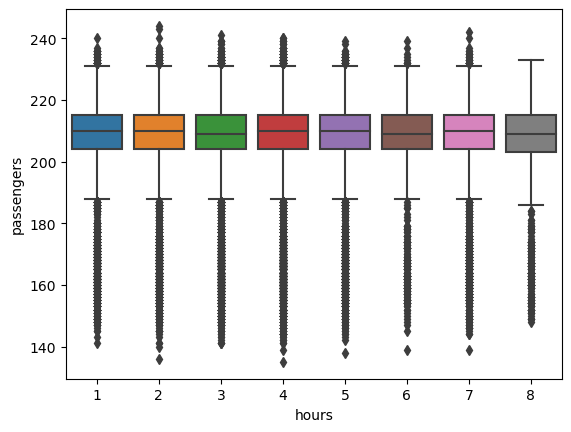

<Figure size 640x480 with 0 Axes>

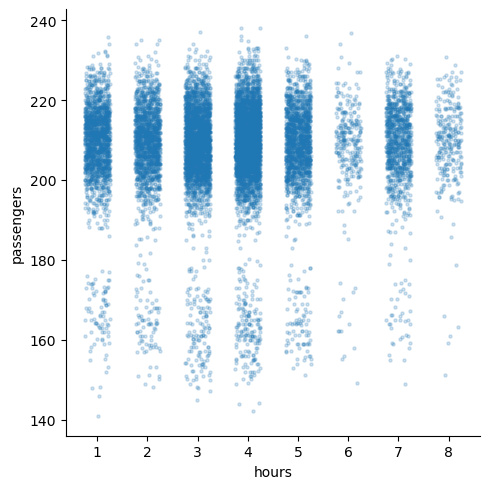

<Figure size 640x480 with 0 Axes>

In [10]:
sns.boxplot(x=flight.hours, y=flight.passengers)
plt.show()
plt.clf()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
sns.lmplot(x='hours', y='passengers', data = flight_sub, x_jitter = .25, y_jitter = .25, \
           scatter_kws={"s": 5, "alpha":0.2},fit_reg = False)
plt.show()
plt.clf()


### Q6. Answers:

**How does the number of passengers change in relation to the length of flights?** 

On average, all flights tend to have between 200 - 220 passengers and on most of them the passenger count can range from around 140 to 240 passengers. However, 4-hour flights tend to have more variation in passenger count, but that may be due to the fact that 4-hour flights are the most common. Similarly, 6 and 8-hour flights are the least common and they have the least variation in passenger count.

## Multivariate Analysis

### Q7. Visualize the relationship between coach and first-class prices on weekends compared to business days. Is there a correlation between ticket prices? If so, is there a difference in correlation between ticket prices on weekends and business days?

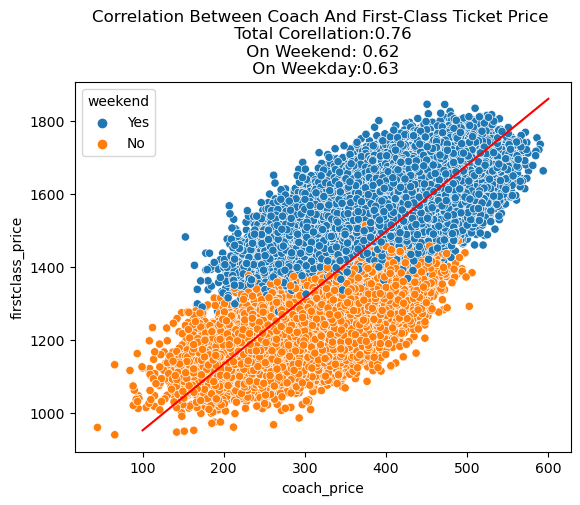

<Figure size 640x480 with 0 Axes>

In [11]:
correlation, p = pearsonr(flight.coach_price, flight.firstclass_price)
correlation_weekend, p = pearsonr(flight.coach_price[flight.weekend == 'Yes'], \
                                  flight.firstclass_price[flight.weekend == 'Yes'])
correlation_business_day, p = pearsonr(flight.coach_price[flight.weekend == 'No'], \
                                       flight.firstclass_price[flight.weekend == 'No'])

model = sm.OLS.from_formula('firstclass_price~coach_price', data=flight)
results = model.fit()
parameters = results.params
x_100 = parameters[1]*100+parameters[0]
x_600 = parameters[1]*600+parameters[0]
sns.scatterplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight)
plt.title(f"Correlation Between Coach And First-Class Ticket Price \n Total Corellation:\
{round(correlation,2)} \n On Weekend: {round(correlation_weekend,2)} \n On Weekday:\
{round(correlation_business_day,2)}")
plt.plot([100,600],[x_100,x_600], color='red')
plt.show()
plt.clf()

### Q7. Answers:

**Visualize the relationship between coach and first-class prices on weekends compared to business days. Is there a correlation between ticket prices? If so, is there a difference in correlation between ticket prices on weekends and business days?**

Coach and first-class ticket prices tend to be higher on weekends, but there is an equally strong correlation between ticket prices on weekends and business days.

### Q8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

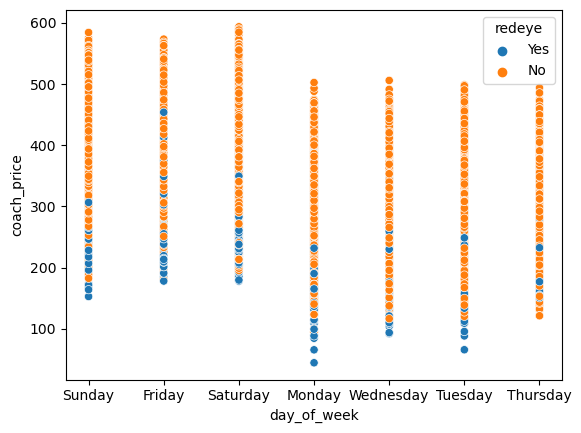

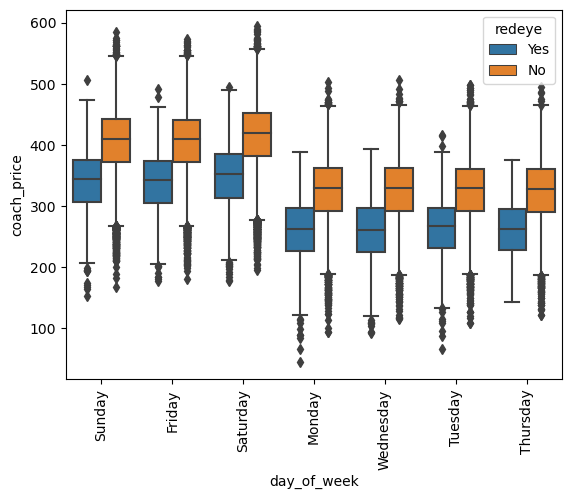

<Figure size 640x480 with 0 Axes>

In [12]:
sns.scatterplot(x='day_of_week',y='coach_price', hue='redeye', data=flight)
plt.show()
plt.clf()


ax = sns.boxplot(x='day_of_week',y='coach_price', hue='redeye', data=flight)
ax.tick_params(axis='x', rotation=90)
plt.show()
plt.clf()

### Q8. Answers:

**How do coach prices differ for redeyes and non-redeyes on each day of the week?** 

Throughout all days of the week night-time flight tickets cost less than day-time tickets on the same day. During business days flight ticket prices are relatively the same. However, both redyes and non-redeyes ticket prices are higher from Friday to Sunday, with the highest prices being on Saturday, and redeyes tickets on these days cost more than non-redeye tickets on business days. 